# Exploratory Data Analysis

In [138]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [139]:
#create the dataframe

cwd = os.getcwd()

df= pd.read_csv(cwd+ "/cleaned-BA_reviews.csv", index_col=0)

#also check if the index are in order

df= df.reset_index(drop=True)

In [140]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | First our morning flight wa...,5,2023-02-28,Canada,True,first morning flight cancelled moved afternoon...
1,✅ Trip Verified | Although it was a bit uncom...,1,2023-02-27,United Kingdom,True,although bit uncomfortable flight economy flig...
2,✅ Trip Verified | Boarding was decently organ...,8,2023-02-27,Belgium,True,boarding decently organised still rather stran...
3,✅ Trip Verified | Boarding on time and departu...,6,2023-02-27,Belgium,True,boarding time departure time flight london hea...
4,✅ Trip Verified | My original flight was canc...,7,2023-02-26,United Kingdom,True,original flight cancelled week actual flight a...


# Visualuzation

In [141]:
#viewing columns
df.columns

Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')

In [142]:
#creating features fromthe data

df_country = df[['reviews','country']]

In [143]:
#showing the features
df_country.head()

,reviews,country
0,✅ Trip Verified | First our morning flight wa...,Canada
1,✅ Trip Verified | Although it was a bit uncom...,United Kingdom
2,✅ Trip Verified | Boarding was decently organ...,Belgium
3,✅ Trip Verified | Boarding on time and departu...,Belgium
4,✅ Trip Verified | My original flight was canc...,United Kingdom


In [144]:
#describing the data
df.describe()

,stars
count,3740.000000
mean,4.473262
std,3.292966
min,1.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,10.000000


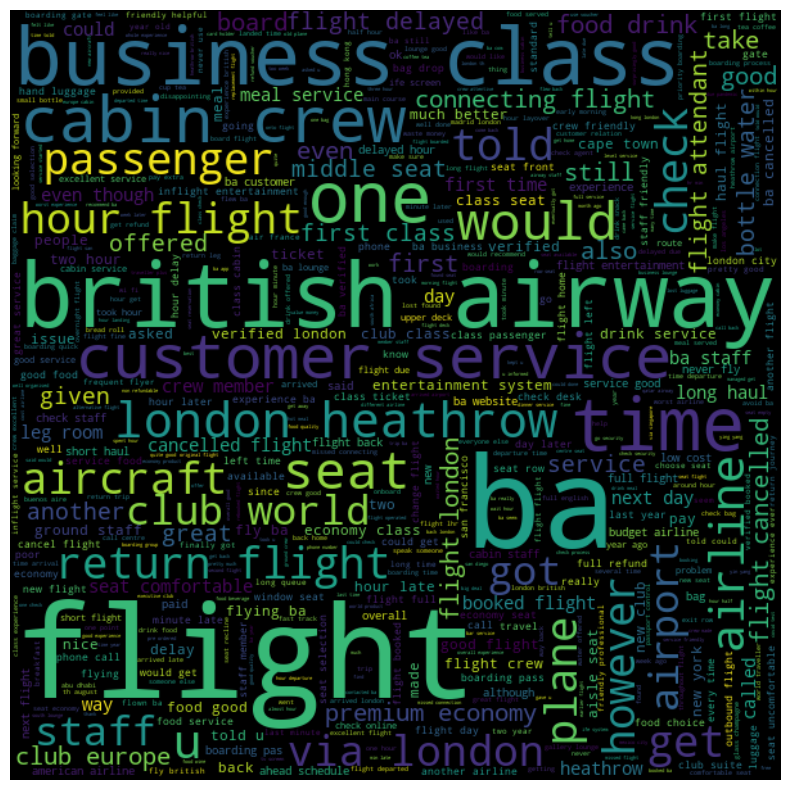

In [145]:
import nltk
from nltk.corpus import stopwords
#start with one reviews
reviews = " ".join(df.corpus)
plt.figure(figsize =(20,10))

stopwords = set(stopwords.words("english"))

#create and generate a wordcloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size= 100, max_words = 500, stopwords=stopwords).generate(reviews)

#Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

There are many words that does not set the idea whether the review is positive of negative.For example, words like "flight", "passenger", etc does not add a conclusive value,hence we have to include them in stopwords list

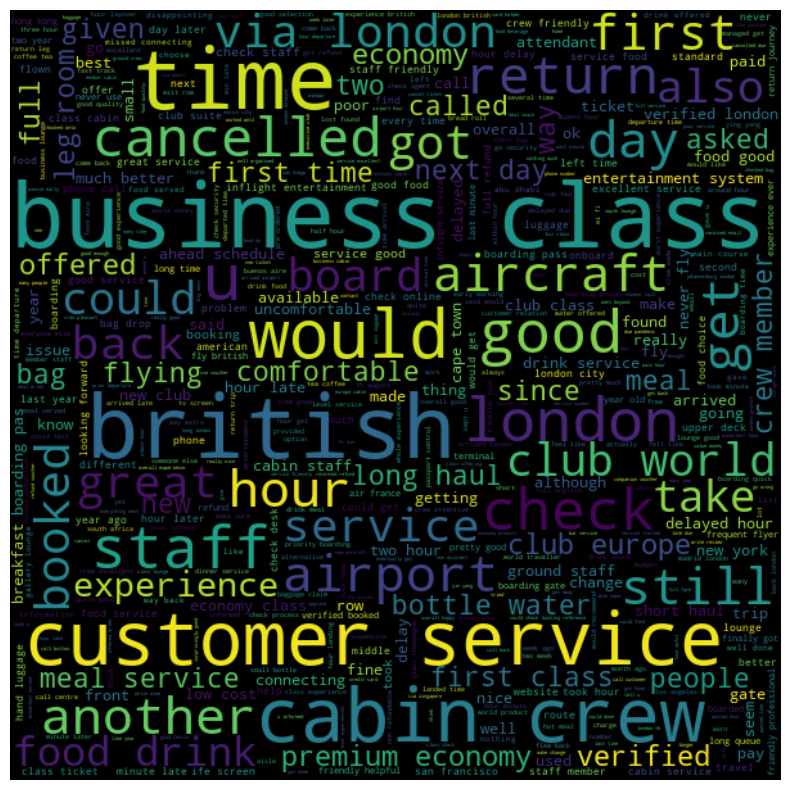

In [146]:
import nltk
from nltk.corpus import stopwords
#start with one reviews
reviews = " ".join(df.corpus)
plt.figure(figsize =(20,10))

stopwords = set(stopwords.words("english"))
stopwords.update(["ba","flight", "passenger","however","told","would" \
                 "british", "airway","airline","plane","one","seat","also" \
                 "london", "heathrow", "even","though"])

#create and generate a wordcloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size= 100, max_words = 500, stopwords=stopwords).generate(reviews)

#Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Word Frequency

In [147]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer


#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words  that will not be used to determine the positive or negative sentinent
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba','passenger', "u", "london"\
                                          "airway", "british", "heathrow", "plane", "1hr", "review"]
            )

new_words = [word for word in words if word not in stopwords]

nlp_words = FreqDist (new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

In [148]:
all_fdist.head()

seat       3161
service    2753
london     2292
time       2275
hour       1977
dtype: int64

<AxesSubplot:>

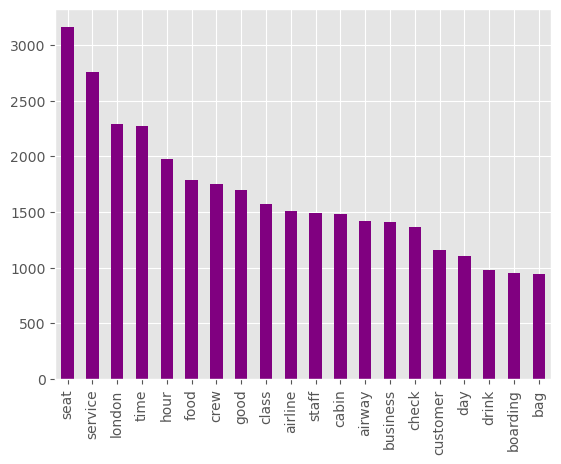

In [165]:
all_fdist[:25].plot(kind= "bar", color= "purple")

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [150]:
country = df['country'].value_counts()

In [151]:
len(country)

49

In [152]:
review = df['reviews'].value_counts()

In [153]:
len(review)

760

<AxesSubplot:title={'center':'Maximum number of reviews by country'}, xlabel='country'>

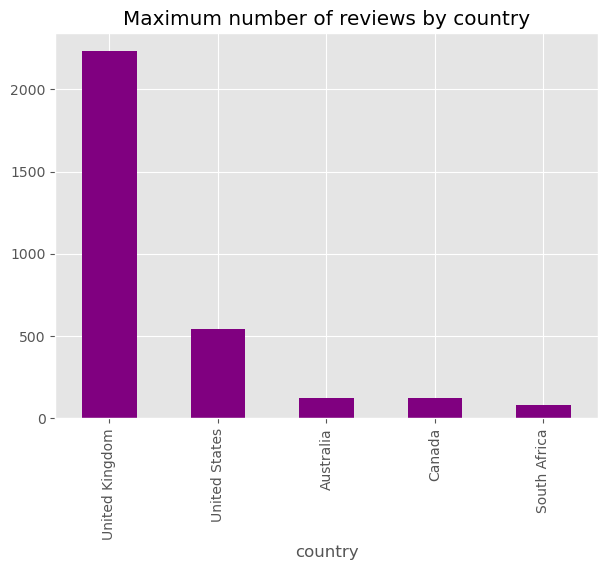

In [154]:
plt.figure(figsize=(7,5))
plt.xlabel("country")
plt.title("Maximum number of reviews by country")
country[:5].plot(kind = "bar", color="purple")

In [155]:
rating = df["stars"].value_counts()

In [156]:
rating

1     1149
10     387
5      376
2      373
9      329
3      322
8      289
4      205
7      166
6      144
Name: stars, dtype: int64

In [157]:
rating.sort_values()

6      144
7      166
4      205
8      289
3      322
9      329
2      373
5      376
10     387
1     1149
Name: stars, dtype: int64

<AxesSubplot:title={'center':'Maximum number of reviews by country'}, xlabel='country'>

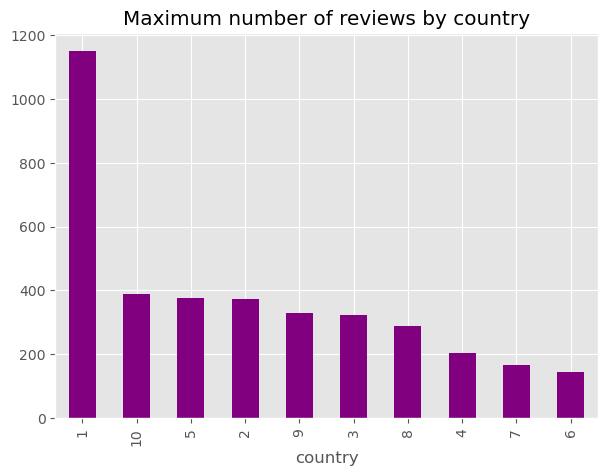

In [158]:
plt.figure(figsize=(7,5))
plt.xlabel("country")
plt.title("Maximum number of reviews by country")
rating.plot(kind = "bar", color="purple",)

In [160]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6= df[df.stars.isin([4,5,6])]
ratings_7_10= df[df.stars.isin([7,8,9,10])]

In [161]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the test of all reviews into list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10, 4)

NameError: name 'get_freq_dist' is not defined